## Experimental critical quantum metrology with the Heisenberg scaling
### npj Quantum Information (2021) 7:170 ; https://doi.org/10.1038/s41534-021-00507-x

The intuitive idea of this paper is the following:

1) Consider a quantum phase transition which occurs at some critical value $B_z^{c}$ of a parameter $B_z$.
We want to estimate $B_z$ in the vicinity of the critical point.

2) We want to do this by adiabatic evolution, to avoid decoherence problems.

3) Start with an easy to prepare ground state, evolve adiabatically until we are close to the critical point

4) Measure of advantage: How does precision scale with measurement time? Classically $T^{-1/2}$, but in Heisenberg limit $T^{-1}$

Abrupt change at quantum phase transition should make for a good sensor!

This paper considers two spins, first described by the Hamiltonian:
$$
\mathcal{H} = B_z(\sigma_z\otimes I+I\otimes \sigma_z)+\sigma_z\otimes \sigma_z  = \begin{pmatrix}
2B_z+1& 0 & 0 & 0\\
0 & -1 & 0 & 0\\
0 & 0 & -1 & 0\\
0 & 0 & 0 & -2B_z+1
\end{pmatrix},
$$
where $B_z$ is the field we want to probe

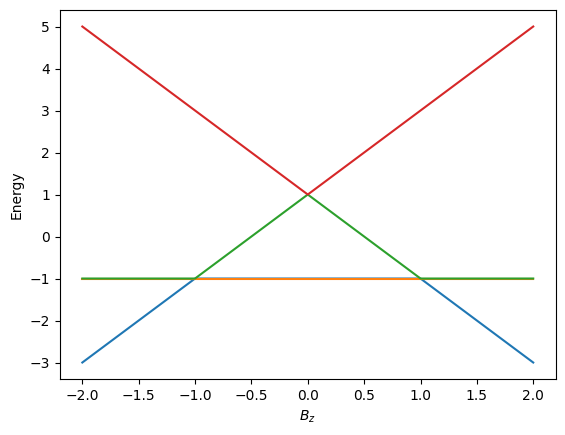

In [1]:
import numpy as np
import matplotlib.pyplot as plt
Bz = 1.2
I = np.eye(2)
sx = np.array([[0,1],[1,0]])
sy = np.array([[0,-1j],[1j,0]])
sz = np.array([[1,0],[0,-1]])

def H_initial(Bz):
    return Bz*(np.kron(sz,I)+np.kron(I,sz))+np.kron(sz,sz)

N = 101
Bz_arr = np.linspace(-2,2,N)
eigs = np.zeros((N,4))
for i in range(N):
    vals,vecs = np.linalg.eigh(H_initial(Bz_arr[i]))
    eigs[i,:] = vals
for i in range(4):
    plt.plot(Bz_arr,eigs[:,i])
plt.xlabel("$B_z$")
plt.ylabel("Energy")
plt.show()

## Analysis of simple model

The spectrum of the model has twofold degeneracy eveywhere, triply degeneracy at $B_z = \pm 1$ where the phase transition happens. Ground state:
$$
|g(B_z)\rangle = \begin{cases}
|00\rangle & B_z< -1,\\
\{|01\rangle, |10\rangle\} & -1<B_z<1\\
|11\rangle & B_z > 1 
\end{cases}
$$

Both for large $B_z$ and small $B_z$ we are in a symmetric spin state, so we should expect the degenerate state to also be in the symmetric manifold, so restrict to:
$$
|g(B_z)\rangle = \frac{|10\rangle+|01\rangle}{\sqrt{2}} \quad -1<B_z<1
$$

The problem now is that the jump at the phase transition is singular, so we are only able to measure $B_z$ at exactly one point (but inifitely well). Ideally we want $|g(B_z)\rangle$ to be a function of $B_z$ for a range of parameters

We can smear out this phase transition by adding a small transverse field, $B_x$:
$$
\tilde{\mathcal{H}}  = B_z(\sigma_z\otimes I+I\otimes \sigma_z)+\sigma_z\otimes \sigma_z + \color{red}{B_x(\sigma_x\otimes I+I\otimes \sigma_x)} = \begin{pmatrix}
2B_z+1& B_x & B_x & 0\\
B_x & -1 & 0 & 0\\
B_x & 0 & -1 & 0\\
0 & B_x & B_x & -2B_z+1
\end{pmatrix},
$$

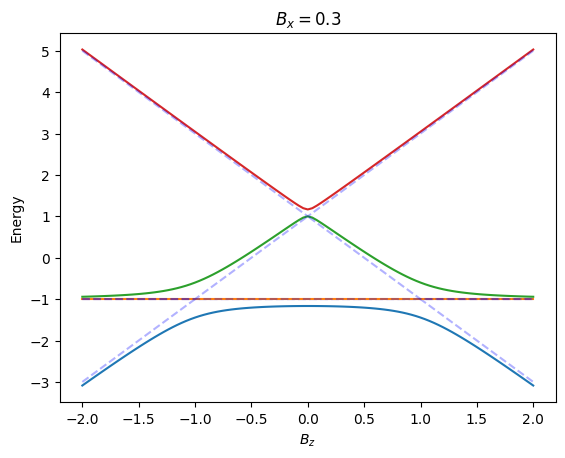

In [2]:
Bx = 0.3
I = np.eye(2)
sx = np.array([[0,1],[1,0]])
sy = np.array([[0,-1j],[1j,0]])
sz = np.array([[1,0],[0,-1]])

def H_with_transverse(Bz,Bx):
    return Bz*(np.kron(sz,I)+np.kron(I,sz))+np.kron(sz,sz)+Bx*(np.kron(sx,I)+np.kron(I, sx))

Bz_arr = np.linspace(-2,2,N)
eigs_Bx = np.zeros((N,4))
for i in range(N):
    vals,vecs = np.linalg.eigh(H_with_transverse(Bz_arr[i],Bx))
    eigs_Bx[i,:] = vals
for i in range(4):
    plt.plot(Bz_arr, eigs_Bx[:,i])
    plt.plot(Bz_arr,eigs[:,i],color="blue",alpha=0.3, linestyle="--")
plt.title("$B_x = $"+str(Bx))
plt.xlabel("$B_z$")
plt.ylabel("Energy")
plt.show()

Note that in this plot the orange curve corresponds to the odd spin state, which can be ignored

## Dependence on $B_x$
How to choose $B_x$? 
1) If we want to remain in the ground state (e.g. stay adiabatic), we should ensure that the gap is large ($B_x$ large)
2) To have high sensitivity to $B_z$, the gap should be small ($B_x$ small)

So there is a trade-off between adiabaticity and sensitivity. Also $B_x$ determines dynamical range of sensor.

## Restricting to two lowest level
Starting from large positive $B_z$, the relevant states for small $B_x$ are $|11\rangle$ and $\frac{|10\rangle+|01\rangle}{\sqrt{2}}$.
Projecting into this space we:
$$
\mathcal{H}_{eff} = -|B_z|\mathbb{1}+(1-|B_z|)\sigma_z+\sqrt{2}B_x\sigma_x,
$$
With band structure:


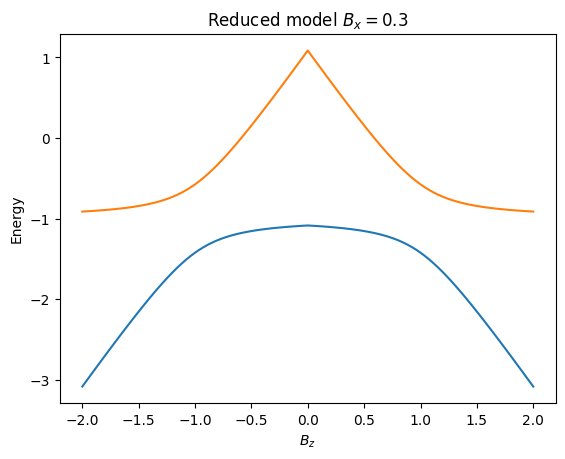

In [3]:
def H_eff(Bz, Bx):
    return -np.abs(Bz)*I+(1-np.abs(Bz))*sz+np.sqrt(2)*Bx*sx

Bz_arr = np.linspace(-2,2,N)
eigs_Bx_red = np.zeros((N,2))
for i in range(N):
    vals,vecs = np.linalg.eigh(H_eff(Bz_arr[i],Bx))
    eigs_Bx_red[i,:] = vals
for i in range(2):
    plt.plot(Bz_arr, eigs_Bx_red[:,i])
plt.title("Reduced model $B_x = $"+str(Bx))
plt.xlabel("$B_z$")
plt.ylabel("Energy")
plt.show()

## Analyzing two-level system
Find ground state of this model to be:
$$
|\tilde{g}(B_z)\rangle = -\sin\frac{\theta}{2}|11\rangle+\cos\frac{\theta}{2}\left(\frac{|01\rangle+|10\rangle}{\sqrt{2}}\right)
$$
With:
$$
\tan \theta = \frac{\sqrt{2}B_x}{1-B_z}
$$
And Quantum Fisher information:
$$
F_Q(|\tilde{g}\rangle) = \frac{2B_x^2}{[(1-B_z)^2+2B_x^2]^2}
$$

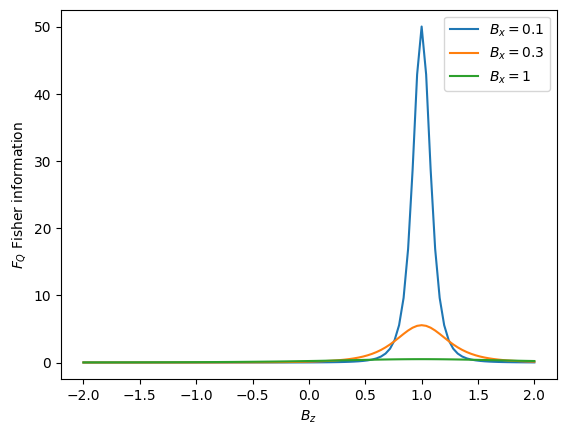

In [4]:
def F_q(Bx, Bz):
    return 2.0*Bx*Bx/(((1-Bz)**2+2*Bx*Bx)**2)

for current_Bx in [0.1, 0.3, 1]:
    plt.plot(Bz_arr, F_q(current_Bx, Bz_arr),label="$B_x = $"+str(current_Bx))
plt.legend()
plt.ylabel("$F_Q$ Fisher information")
plt.xlabel("$B_z$")
plt.show()

Looks like smaller $B_x$ gives higher Fisher information, but the gap also becomes smaller. Plotting the gap as a function of $B_x$ gives:

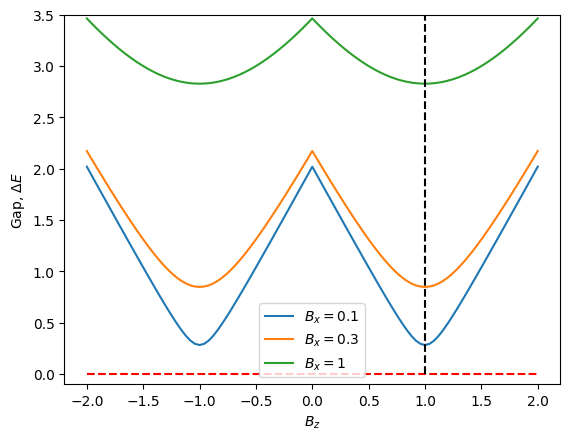

In [5]:
for current_Bx in [0.1, 0.3, 1]:
    current_eigs_Bx_red = np.zeros((N,2))
    for i in range(N):
        vals,vecs = np.linalg.eigh(H_eff(Bz_arr[i],current_Bx))
        current_eigs_Bx_red[i,:] = vals
    plt.plot(Bz_arr, current_eigs_Bx_red[:,1]-current_eigs_Bx_red[:,0],label="$B_x = $"+str(current_Bx))
plt.hlines(xmin = Bz_arr[0],xmax=Bz_arr[-1], y = 0,color="red",linestyle="--")
plt.vlines(x=1,ymin = 0, ymax=4,color="black",linestyle="--")
plt.ylim([-0.1, 3.5])
plt.legend()
plt.ylabel("Gap, $\\Delta E$")
plt.xlabel("$B_z$")
plt.show()

## Choosing an adiabatic protocol

A smaller gap means that we need to go slower to avoid going to a higher state
Can define an adiabatic protocol:

$$\mathcal{H}_{\mathrm{ad}} = [1-A(s)]\tilde{\mathcal{H}}(B_{z0})+A(s)\tilde{\mathcal{H}}(B_{zc})$$
Where $s =t/T \in [0,1]$ describes the path and $A(0) = 0$ and $A(1) = 1$.

The simplest choice $A(s) = s$ gives the required adiabatic time scaling as $T\propto 1/(\Delta E)^2\propto B_x^{-2}$.

This is the same scaling as the Fisher, so we get linear scaling with $T$: $F_Q\propto T$.

Alternatively, can determine adiabatic path dependent on local gap $\frac{dA(s)}{ds} \propto \Delta^2(s)$, which can go beyond shot noise limit.

But can also numerically optimize $A(s)$ as follows:
1) Choose threshold fidelity $P_c$

2) Let $A_1$ be minimal value such that (with $|g(A_1)\rangle$ ground state and $\tau$ fixed constant.
   $$|\langle g(A_1)|e^{-i\mathcal{H}(A_1)\tau}|g(0)\rangle|\leq P_c$$
3) Then iterate according to:
    $$|\langle g(A_{i+1})|e^{-i\mathcal{H}(A_1)\tau}|g(A_i)\rangle|\leq P_c$$
4) Continue until $A_N \geq 1$

Can numerically find path such that $T \propto 1/B_x$ giving quadratic advantage! This gives the following plots from the paper:

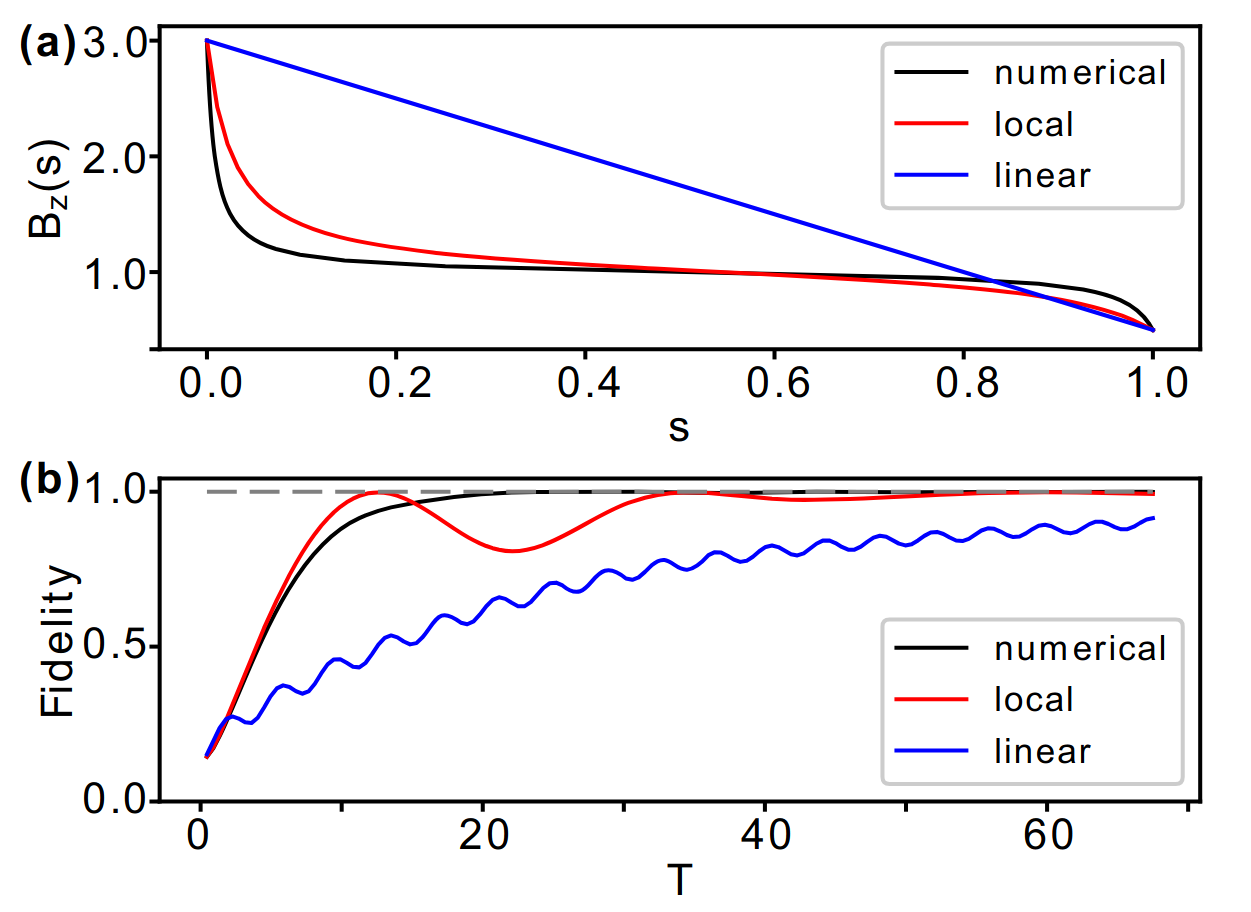

Next step: Finding optimal basis (not covered here). Final circuit diagram:
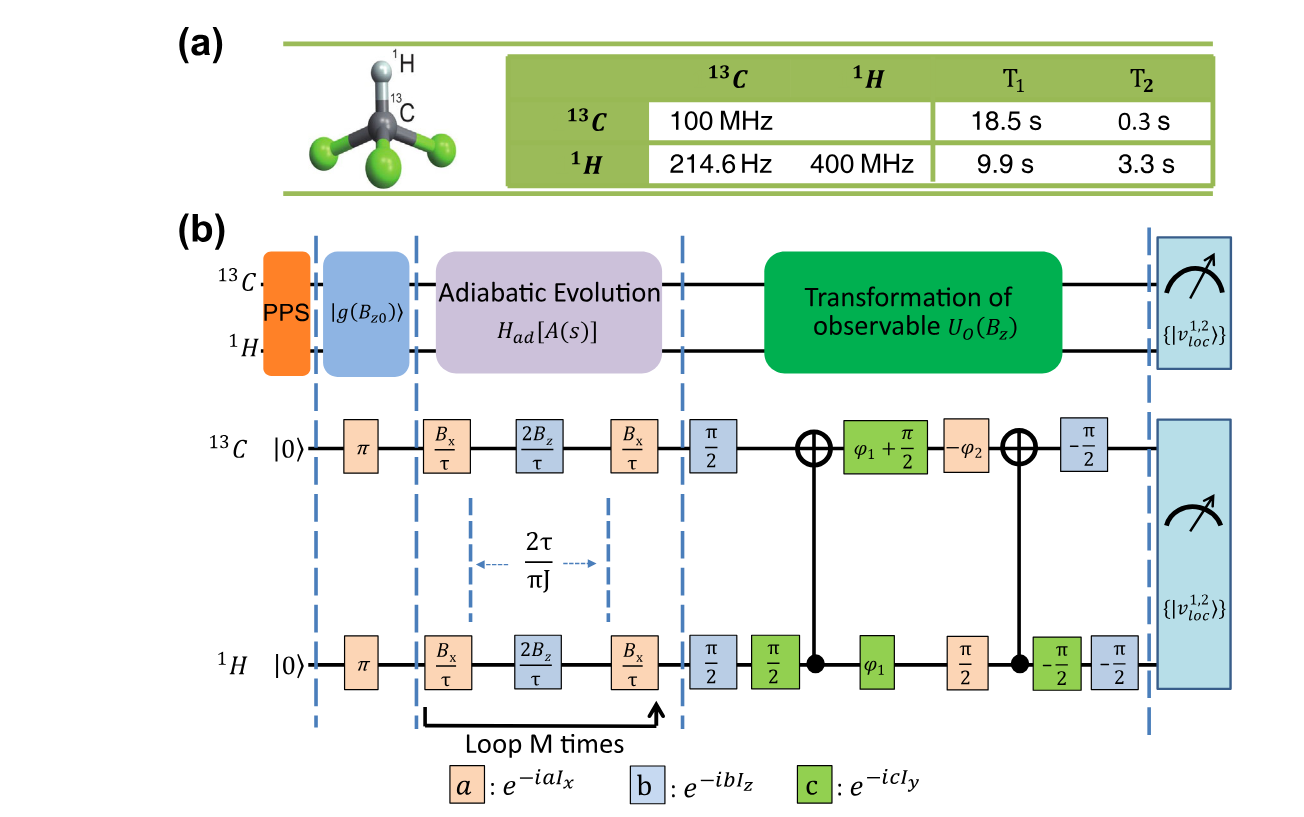

Final experimental plots:
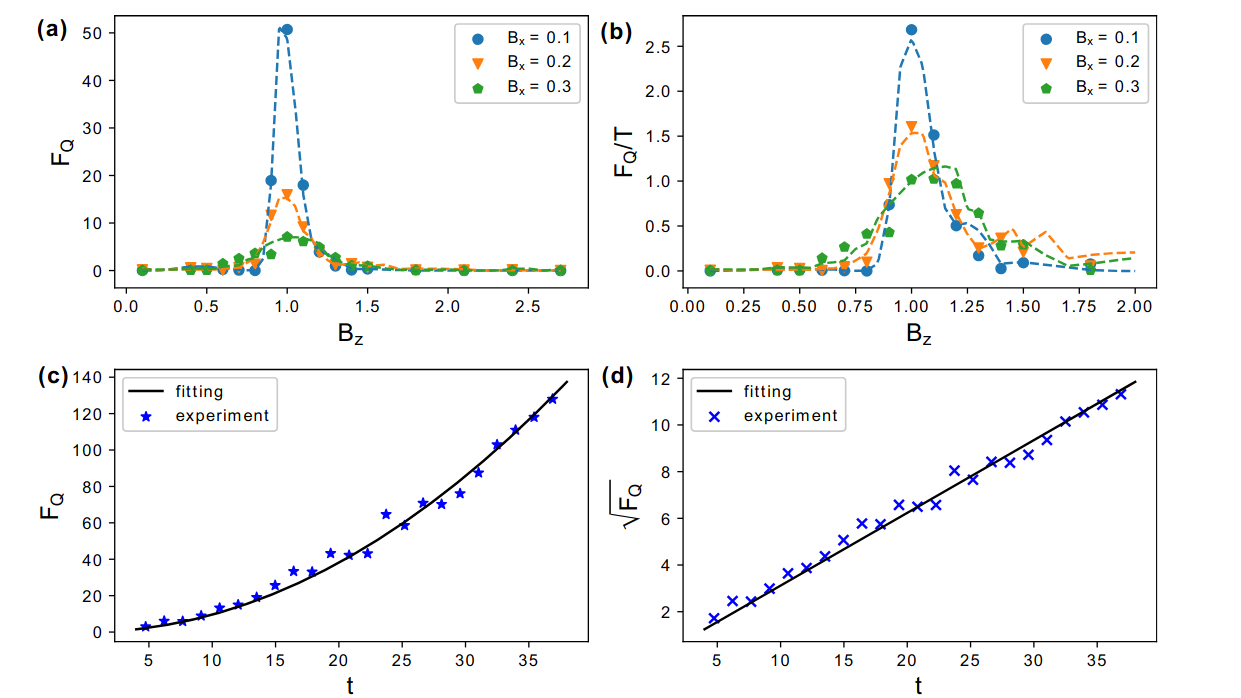